## Exploratory data analysis 

Before we can work with the data and fit the predictive models, we need to get an overview about the different datasets. Hence, we conduct a brief explanatory data analysis such that we can have an idea about the structure of the data, the features we are dealing with and possible issues like missing values or outliers. 

#### Import the packages and datasets

In the following code chuncks, we import all the python modules and datasets which will be used in this jupyter notebook. While importing the datasets, we select `index_col=0` to use the ticker abbreviation as indices. The remaining columns of the dataset are the features and the response variables.

In [1]:
# import the python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# modules needed for the iterative imputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

# modules needed for the PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load the data sets
dat14 = pd.read_csv("dataset/2014_Financial_Data.csv", index_col=0)
dat15 = pd.read_csv("dataset/2015_Financial_Data.csv", index_col=0)
dat16 = pd.read_csv("dataset/2016_Financial_Data.csv", index_col=0)
dat17 = pd.read_csv("dataset/2017_Financial_Data.csv", index_col=0)
dat18 = pd.read_csv("dataset/2018_Financial_Data.csv", index_col=0)

# display the dataset for the data in 2014
dat14 

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.000000e+00,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,-6.893600e+04,...,-0.0384,0.0000,-0.0041,-0.0049,0.0000,0.0000,0.0213,Technology,29.362884,1
TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,1.132600e+07,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,1.790100e+07,...,0.1529,0.0000,-0.1872,0.1823,0.0000,0.2830,-0.0637,Technology,-31.167763,0
USATP,4.200000e+07,NaN,2.700000e+07,1.500000e+07,NaN,1.400000e+07,1.500000e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,-23.558900,0
WSTG,3.407580e+08,0.1344,3.159480e+08,2.481000e+07,0.000000e+00,1.651300e+07,1.651300e+07,8.297000e+06,-4.720000e+05,8.758000e+06,...,-0.0333,0.1338,0.0023,0.0890,0.0000,0.0000,0.0650,Technology,7.779579,1


#### Structure of the datasets

Above, we already displayed the top and bottom observations of the financial data for 2014. In this case study, we will work with yearly stock data from 2014 to 2018, hence we have five datasets. The datasets have a different number of observations (stocks) and also different observations. However, the column indices are the same throughout all the years. To get an insight on these columns, we display the column names in the following code chunk:


In [3]:
list(dat14.columns)

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [4]:
dat14.info() # general information about the 2014 dataset

<class 'pandas.core.frame.DataFrame'>
Index: 3808 entries, PG to WTT
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 6.5+ MB


All the datasets consist of 224 variables with the following data types:
* 222 numeric variables &emsp; Financial indicators
* 1 integer variable  &emsp;&emsp;&emsp;&nbsp; Class variable (0 or 1), hence rather categorical (binary) than numeric
* 1 object variable &emsp;&emsp;&emsp;&nbsp;&nbsp; Categorical variable for the different sectors


We can see that most of the columns show specific accounting measures about the respective listed company. It is important to note that there are different kinds of financial key figures as we have absolute values (e.g. revenue), growth rates (e.g. revenue growth) and financial ratios (e.g. EPS). Hence, the measures operate on **different scales**. Therefore, standardization may be required to avoid some sort of distortion before fitting some models.

Another issue which will probably manifest itself during the model selection will be **multicollinearity**. This is due to the circumstance that many of the above listed features are highly correlated with each other. For example, a high EBITDA most probably correlates with a high EBIT. Some variables also represent the same indicator, though measured through a different time period, such as Net Income Growth (per Share) which appears three time as a feature, but computed for the last 3, 5 and 10 years. Thus, there will be a lot of redundant information such that not all of the features may be required in the fitting process, but rather a selection of them. In Statistics, one often prefers to have a subset of the variables that are sufficient for explaining rather than a more complex model which does not explain the data significantly better (Friedman et al. (2001)).

The next chunk shows that the datasets consist of a different number of observations. This means that we do not have the same stocks over the whole time period of five years. Because of this and due to the fact that we only have the data for five years, it is not possible to construct a reliable time series model or to even generate the lagged price variations because some stocks are not represented in all datasets. 


In [5]:
print("The 2014 dataset has", dat14.shape[0], "observations.")
print("The 2015 dataset has", dat15.shape[0], "observations.")
print("The 2016 dataset has", dat16.shape[0], "observations.")
print("The 2017 dataset has", dat17.shape[0], "observations.")
print("The 2018 dataset has", dat18.shape[0], "observations.")

The 2014 dataset has 3808 observations.
The 2015 dataset has 4120 observations.
The 2016 dataset has 4797 observations.
The 2017 dataset has 4960 observations.
The 2018 dataset has 4392 observations.


#### Missing values

The major problem concerning the available data seem to be the missing values. A significant proportion of the entries are NaN values which prevents the implementation of most Machine Learning algorithms. Hence, these values need to be imputed if possible. Before we can fix this issue, it is handy to get an overview of these missing values. This enables us to detect whether data is systematically missing or if the values are missing at random. In the following chunks, we will take a look at every dataset individually (from 2014 to 2018). For this purpose, the code will show the number of total values in the dataset, print how many of them are missing and plot a heatmap for each year to mark the missing values in yellow. 



------------- 2014 -------------
3808 observations, 224 variables
Nb. of values:   852992
Nb. of NaN:      101103
Portion of NaN:  0.1185


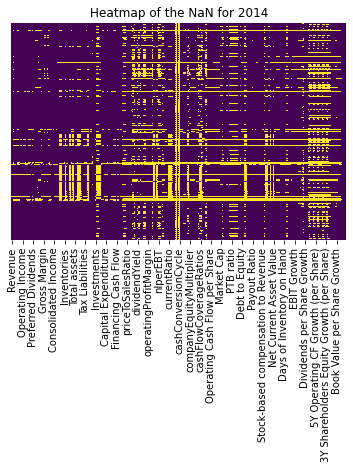

In [6]:
missing = dat14.isnull().sum().sum()
total = dat14.size
print(13*"-", "2014", 13*"-")
print(dat14.shape[0], "observations,", dat14.shape[1], "variables")
print("Nb. of values:  ", total)
print("Nb. of NaN:     ", missing)
print("Portion of NaN: ", round(missing/total, 4))

#plot a missing value heatmap
ax = plt.axes()
sns.heatmap(dat14.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2014')
plt.show()

------------- 2015 -------------
4120 observations, 224 variables
Nb. of values:   922880
Nb. of NaN:      114348
Portion of NaN:  0.1239


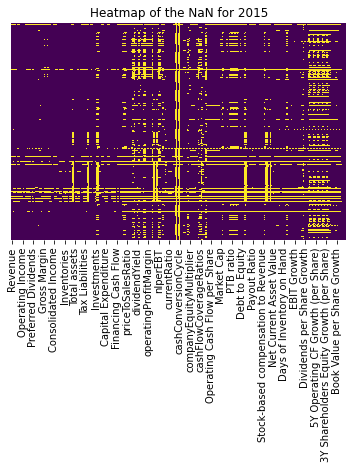

In [7]:
missing = dat15.isnull().sum().sum()
total = dat15.size
print(13*"-", "2015", 13*"-")
print(dat15.shape[0], "observations,", dat15.shape[1], "variables")
print("Nb. of values:  ", total)
print("Nb. of NaN:     ", missing)
print("Portion of NaN: ", round(missing/total, 4))

#plot a missing value heatmap
ax = plt.axes()
sns.heatmap(dat15.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2015')
plt.show()

------------- 2016 -------------
4797 observations, 224 variables
Nb. of values:   1074528
Nb. of NaN:      212549
Portion of NaN:  0.1978


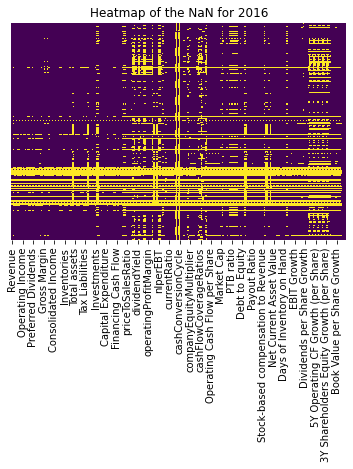

In [8]:
missing = dat16.isnull().sum().sum()
total = dat16.size
print(13*"-", "2016", 13*"-")
print(dat16.shape[0], "observations,", dat16.shape[1], "variables")
print("Nb. of values:  ", total)
print("Nb. of NaN:     ", missing)
print("Portion of NaN: ", round(missing/total, 4))

#plot a missing value heatmap
ax = plt.axes()
sns.heatmap(dat16.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2016')
plt.show()

------------- 2017 -------------
4960 observations, 224 variables
Nb. of values:   1111040
Nb. of NaN:      226269
Portion of NaN:  0.2037


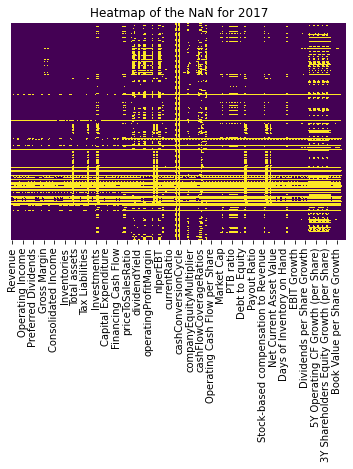

In [9]:
missing = dat17.isnull().sum().sum()
total = dat17.size
print(13*"-", "2017", 13*"-")
print(dat17.shape[0], "observations,", dat17.shape[1], "variables")
print("Nb. of values:  ", total)
print("Nb. of NaN:     ", missing)
print("Portion of NaN: ", round(missing/total, 4))

#plot a missing value heatmap
ax = plt.axes()
sns.heatmap(dat17.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2017')
plt.show()

------------- 2018 -------------
4392 observations, 224 variables
Nb. of values:   983808
Nb. of NaN:      97298
Portion of NaN:  0.0989


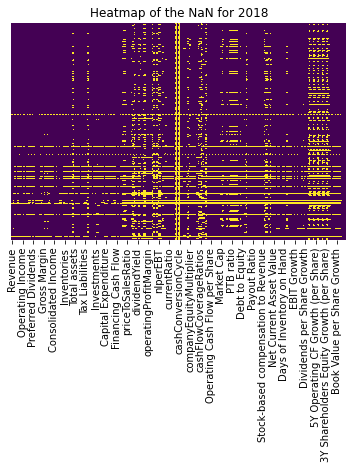

In [10]:
missing = dat18.isnull().sum().sum()
total = dat18.size
print(13*"-", "2018", 13*"-")
print(dat18.shape[0], "observations,", dat18.shape[1], "variables")
print("Nb. of values:  ", total)
print("Nb. of NaN:     ", missing)
print("Portion of NaN: ", round(missing/total, 4))

#plot a missing value heatmap
ax = plt.axes()
sns.heatmap(dat18.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2018')
plt.show()

There are a lot of missing values in all datasets as it is shown in the plots above. Especially for 2016 and 2017, which are also the years with the most observations, 20% of the data points are NaN values. We can detect some sort of pattern: there are some variables which tend to have more missing values throughout all datasets. At the same time, there are many observations for which most of the data is missing. Therefore, we may need to remove these variables and observations as they contain almost no to little information about the respective company. As the missing data represents a significant part of the datasets, the methods on how to deal with this issue will have a remarkable impact on our models. A predictive model is only  as good as the data for training and testing allows it to be. In order to compare different methods for imputation, we will use not only one, but three different methods to handle the missing values as this will be outlined in the next section.

#### Zero values

Another finding is that there are a substantial and over time relatively constant amount of zero values. In contrast to the missing values, we will assume that zero values are correct. Because there are multiple financial indicators in the dataset for which a zero value may be plausible, it is not straight forward to determine which zero values are erroneous and which ones are not. Hence, we will not look further into this matter and leave this issue as a possible research gap for the future.

In [11]:
zeros = dat14.isin([0]).sum().sum()
total = dat14.size
print(13*"-", "2014", 13*"-")
print("Nb. of zeros:     ", zeros)
print("Portion of zeros: ", round(zeros/total, 4))

zeros = dat15.isin([0]).sum().sum()
total = dat15.size
print(13*"-", "2015", 13*"-")
print("Nb. of zeros:     ", zeros)
print("Portion of zeros: ", round(zeros/total, 4))

zeros = dat16.isin([0]).sum().sum()
total = dat16.size
print(13*"-", "2016", 13*"-")
print("Nb. of zeros:     ", zeros)
print("Portion of zeros: ", round(zeros/total, 4))

zeros = dat17.isin([0]).sum().sum()
total = dat17.size
print(13*"-", "2017", 13*"-")
print("Nb. of zeros:     ", zeros)
print("Portion of zeros: ", round(zeros/total, 4))

zeros = dat18.isin([0]).sum().sum()
total = dat18.size
print(13*"-", "2018", 13*"-")
print("Nb. of zeros:     ", zeros)
print("Portion of zeros: ", round(zeros/total, 4))


------------- 2014 -------------
Nb. of zeros:      115711
Portion of zeros:  0.1357
------------- 2015 -------------
Nb. of zeros:      121553
Portion of zeros:  0.1317
------------- 2016 -------------
Nb. of zeros:      131597
Portion of zeros:  0.1225
------------- 2017 -------------
Nb. of zeros:      135709
Portion of zeros:  0.1221
------------- 2018 -------------
Nb. of zeros:      133128
Portion of zeros:  0.1353


## Data preparation

This section of the notebook contains the removal and imputation of the NaN values. Our first idea was to use a KNN or Random Forest iterative imputer to predict the missing values using the available data on the respective dataset. However, this method for imputation did not work as it always produced any kind of errors. We think that this is due to the circumstance, that for some variables and even features most data points are completely missing. Therefore, in a first step we will cut off observations and also some features. This will lead to datasets with far less but more uniformly missing data. On this reduced dataset, we will then use the following imputation strategies:
* Imputation using sector-wise median values per feature
* Imputation using a Random Forest iterative imputer

First, we will look into the issue that there are observations which mainly consists of NaN values. Especially in the data for 2016 and 2017 there are a lot of such cases as shown in the heatmaps. However, before removing observations with an elevated portion of missing values, it is important to analyze whether these values tend to have a negative or a positive change in the stock price. This is interesting because we can see if there is a connection between the price variation of a stock and the ability or even the willingness of a company to reveal information regarding some financial indicators. 

The following chunk shows us how many observations consist of more than 50% NaN throughout all variables for each year, and also how many of them have Class 0 which means its stock price fell in the following year. 

In [12]:
# list of the datasets
sets = [dat14, dat15, dat16, dat17, dat18]

# preallocation
half_missing = np.empty(5)
class0 = np.empty(5)

for i in range(len(sets)):
    # nb portion of NaN per stock
    percent_nans = (sets[i].isnull().sum(axis = 1)/sets[i].shape[1] * 100)
    # first condition: how many obs. have more than 50% NaN
    condition1 = percent_nans > 50
    half_missing[i] = condition1.sum()
    # second condition: how many obs. with more than 50% NaN have Class 0
    condition2 = sets[i][condition1]["Class"] == 0
    class0[i] = condition2.sum()
    
# print the findings    
print("Obs. with more than 50% NaN in Dat14:", half_missing[0], ", thereof with class 0:", class0[0])
print("Obs. with more than 50% NaN in Dat15:", half_missing[1], ", thereof with class 0:", class0[1])
print("Obs. with more than 50% NaN in Dat16:", half_missing[2], ", thereof with class 0:", class0[2])
print("Obs. with more than 50% NaN in Dat17:", half_missing[3], ", thereof with class 0:", class0[3])
print("Obs. with more than 50% NaN in Dat18:", half_missing[4], ", thereof with class 0:", class0[4])



Obs. with more than 50% NaN in Dat14: 186.0 , thereof with class 0: 96.0
Obs. with more than 50% NaN in Dat15: 284.0 , thereof with class 0: 72.0
Obs. with more than 50% NaN in Dat16: 730.0 , thereof with class 0: 111.0
Obs. with more than 50% NaN in Dat17: 830.0 , thereof with class 0: 626.0
Obs. with more than 50% NaN in Dat18: 251.0 , thereof with class 0: 30.0


There does not seem to be a clear relation between the observations with a large portion of NaN and the class label. In 2014, around half of these observations with more than 50% NaN have Class 0, the other half has Class 1. For 2015, 2016 and 2018 most of these observations even belong to Class 1 which means that their stock rose in the subsequent year. However, in the 2017 data most of the observations with many NaN belong to Class 0. 

As there does not seem to be a clear relation between the amount of missing values and the price variation of the stock, we will just drop these observations for simplicity as they don't seem to contain any relevant information about the price variation. The removal of these observations is carried out in the following chunk: 

In [13]:
sets = [dat14, dat15, dat16, dat17, dat18]
names = ["dat14", "dat15", "dat16", "dat17", "dat18"]

for i in range(len(sets)):
    percent_nans = (sets[i].isnull().sum(axis = 1)/sets[i].shape[1] * 100)
    # Clean dataset applying thresholds for nan-values
    condition1 = percent_nans > 50
    print(names[i], "INITIAL NUMBER OF OBS.:", sets[i].shape[0])
    sets[i] = sets[i].drop(sets[i][condition1].index, 0)
    print(names[i], "NUMBER OF OBS. AFTER NaN THRESHOLD 50%:", sets[i].shape[0])
    print(50*"-")
  
# update the data sets
dat14 = sets[0]
dat15 = sets[1]
dat16 = sets[2]
dat17 = sets[3]
dat18 = sets[4]
    

dat14 INITIAL NUMBER OF OBS.: 3808
dat14 NUMBER OF OBS. AFTER NaN THRESHOLD 50%: 3622
--------------------------------------------------
dat15 INITIAL NUMBER OF OBS.: 4120
dat15 NUMBER OF OBS. AFTER NaN THRESHOLD 50%: 3836
--------------------------------------------------
dat16 INITIAL NUMBER OF OBS.: 4797
dat16 NUMBER OF OBS. AFTER NaN THRESHOLD 50%: 4067
--------------------------------------------------
dat17 INITIAL NUMBER OF OBS.: 4960
dat17 NUMBER OF OBS. AFTER NaN THRESHOLD 50%: 4130
--------------------------------------------------
dat18 INITIAL NUMBER OF OBS.: 4392
dat18 NUMBER OF OBS. AFTER NaN THRESHOLD 50%: 4141
--------------------------------------------------


After dropping the observations with more than 50% NaN, we get more compact datasets which countain a rather similar amount of observations compared to before. Especially the data for 2016 and 2017 experienced a remarkable shrinkage which is no surprise. 

**Side note**: Here, we also removed observations from the 2018 dataset which will be our test set in this case study. Hence, there will be **no investment recommendation** for these shares because we do not have enough data for them. Our models therefore only yields recommendations for shares for which less that 50% of the financial indicators are missing.

#### Feature Selection

In the following, we will now tackle the missing values with regard to the features. In the NaN heatmaps from above we already saw that some features have more missing values than others. To know which variables have a higher percentage in NaN values, we will plot the portion of missing values for every dataset ordered by the variables with the most NaN percentage.

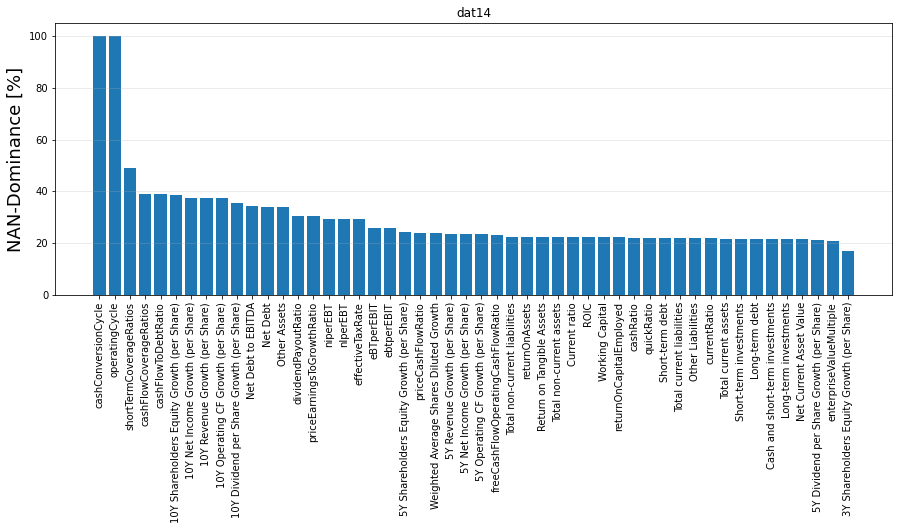

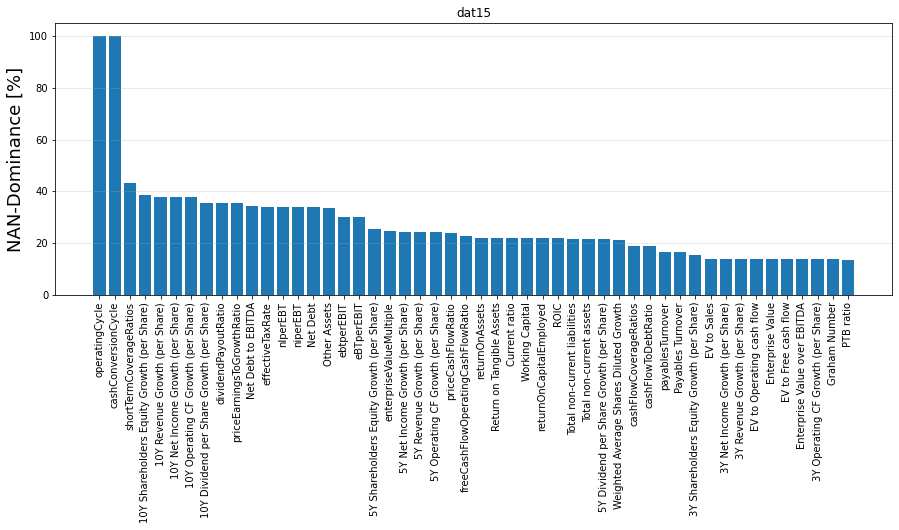

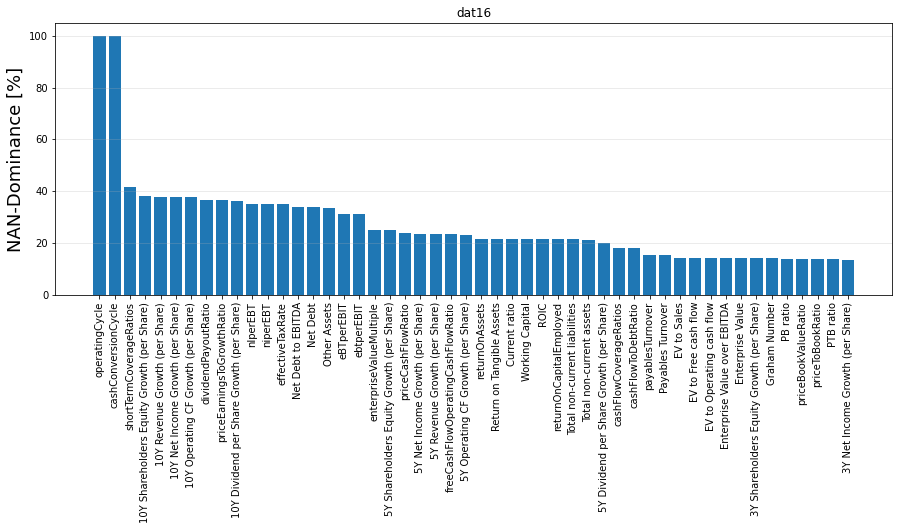

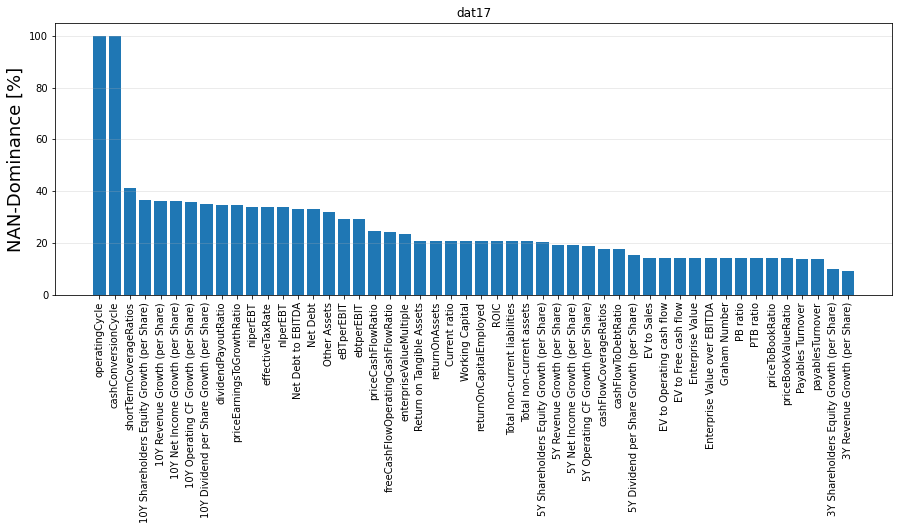

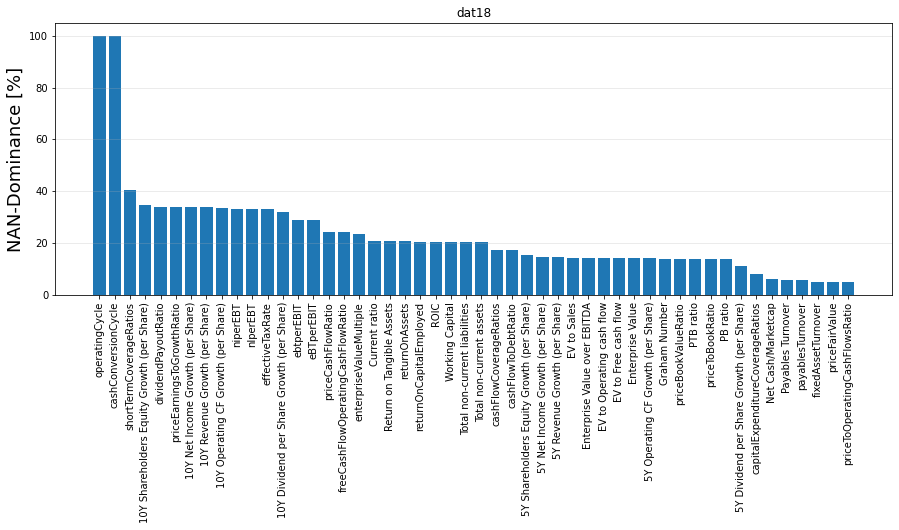

In [14]:
# Find percent of nan-values per feature

sets = [dat14, dat15, dat16, dat17, dat18]
names = ["dat14", "dat15", "dat16", "dat17", "dat18"]

for i in range(len(sets)):
    percent_nans = (sets[i].isnull().sum()/sets[i].shape[0] * 100).sort_values(ascending=False)
    df_nans = pd.concat([ percent_nans], axis=1, keys=['Percent NaN'])

    # Graphical representation
    plt.figure(figsize=(15,5))
    plt.bar(np.arange(50), df_nans['Percent NaN'].iloc[:50].values.tolist())
    plt.xticks(np.arange(50), df_nans['Percent NaN'].iloc[:50].index.values.tolist(), rotation='90')
    plt.ylabel('NAN-Dominance [%]', fontsize=18)
    plt.grid(alpha=0.3, axis='y')
    plt.title(names[i])
    plt.show()
    



As shown in the five barplots above, there are some variables which contain a high portion of NaN values. We can also see that mostly the same variables are concerned. In particular, we denote that both cashConversionCycle and operatingCycles are missing for almost every observation in all of the data sets.

To achieve a solid prediction performance, we want to center out attention on those variables for which most of the data is already given. We want to corrupt the dataset as little as possible through the imputation of the missing values. Therefore, we will only maintain those variables which have less than 20% NaN values. This threshold apears somewhat arbitrary, however the prediction results did not change considerably for different thresholds from 15 to 40%. 

When we remove the features, we need to remove them in all datasets. At the same time, a feature which in one dataset has more than 20% NaN may be slightly below this threshold in one of the other years. To maintain the same features for all datasets, we will therefore remove all the features which had more that 20% missing values in at least one of the datasets used for training. To avoid any contamination of the training set with information from the test set, we therefore will only remove those features which had more than 20% missing values in one of the years from 2014 to 2017.  

We hold the 2018 data back as our test set. We opted to do this blockwise train-test-split instead of a random split over all observations across all years because of the time series nature of the available data. We will come back to this matter towards the end of this notebook when we will create the train and test sets. 


In [15]:
dropped_features = []

sets = [dat14, dat15, dat16, dat17] 
# dat18 is left out in this step to avoid an influence of the test set on the training set.

for i in range(len(sets)):
    percent_nans = (sets[i].isnull().sum()/sets[i].shape[0] * 100).sort_values(ascending=False)
    df_nans = pd.concat([percent_nans], axis=1, keys=['Percent NaN'])
    #get all variables with more than 20% missing values
    var = (df_nans[df_nans['Percent NaN'] > 20]).index
    for j in var:
        if j not in dropped_features:
            dropped_features.append(j)

print(len(dropped_features))
dropped_features

  

49


['cashConversionCycle',
 'operatingCycle',
 'shortTermCoverageRatios',
 'cashFlowCoverageRatios',
 'cashFlowToDebtRatio',
 '10Y Shareholders Equity Growth (per Share)',
 '10Y Net Income Growth (per Share)',
 '10Y Revenue Growth (per Share)',
 '10Y Operating CF Growth (per Share)',
 '10Y Dividend per Share Growth (per Share)',
 'Net Debt to EBITDA',
 'Net Debt',
 'Other Assets',
 'dividendPayoutRatio',
 'priceEarningsToGrowthRatio',
 'niperEBT',
 'nIperEBT',
 'effectiveTaxRate',
 'eBTperEBIT',
 'ebtperEBIT',
 '5Y Shareholders Equity Growth (per Share)',
 'priceCashFlowRatio',
 'Weighted Average Shares Diluted Growth',
 '5Y Revenue Growth (per Share)',
 '5Y Net Income Growth (per Share)',
 '5Y Operating CF Growth (per Share)',
 'freeCashFlowOperatingCashFlowRatio',
 'Total non-current liabilities',
 'returnOnAssets',
 'Return on Tangible Assets',
 'Total non-current assets',
 'Current ratio',
 'ROIC',
 'Working Capital',
 'returnOnCapitalEmployed',
 'cashRatio',
 'quickRatio',
 'Short-te

In total, 49 of the variables had more than 20% NaN in at least one of the datasets from 2014 to 2017. We remark, that we often have very similar variables as we can see on the list above, for example niperEBT and nIperEBT or eBTperEBIT and ebtperEBIT. We can also see that variables are often computed on a 5 or 10 year period and tend to be missing as well as financial indicators that related to the cash flow of the company. 

Obviously this method to deal with the missing values bear a caveat. With our threshold choices, we leave a remove a remarkable part of the data which means that we lose some information about the data. With these conservative threshold choices, we wanted to remove as little observations as necessary while getting rid of unnecessary variables at the same time. To train the models, it helps to have more observations. Meanwhile, more variables do not lead to better models as it enhances overfitting. Hence, for a better generalization of the model, one prefers a more simpler model which means less variables. Thus, we opted to remove rather relatively  large number of variables, 49 in total, such that our dataset shrank from 224 to 175 variables which is still a rather large number of features.  

The following code chunk carries out the removal of the aforementioned features and illustrates the change in all of the datasets. Note however, that in this part we also remove the features from the 2018 data set, the test set although we only  used the information from 2014 to 2017 to select the features. 

In [16]:
sets = [dat14, dat15, dat16, dat17, dat18]
names = ["dat14", "dat15", "dat16", "dat17", "dat18"]

for i in range(len(sets)):
    print(names[i], "INITIAL NUMBER OF FEATURES:", sets[i].shape[1])
    sets[i] = sets[i].drop(dropped_features, 1)
    print(names[i], "NUMBER OF FEATURES AFTER NaN THRESHOLD 20%:", sets[i].shape[1])
    print(50*"-")
    
# update the data sets
dat14 = sets[0]
dat15 = sets[1]
dat16 = sets[2]
dat17 = sets[3]
dat18 = sets[4]


dat14 INITIAL NUMBER OF FEATURES: 224
dat14 NUMBER OF FEATURES AFTER NaN THRESHOLD 20%: 175
--------------------------------------------------
dat15 INITIAL NUMBER OF FEATURES: 224
dat15 NUMBER OF FEATURES AFTER NaN THRESHOLD 20%: 175
--------------------------------------------------
dat16 INITIAL NUMBER OF FEATURES: 224
dat16 NUMBER OF FEATURES AFTER NaN THRESHOLD 20%: 175
--------------------------------------------------
dat17 INITIAL NUMBER OF FEATURES: 224
dat17 NUMBER OF FEATURES AFTER NaN THRESHOLD 20%: 175
--------------------------------------------------
dat18 INITIAL NUMBER OF FEATURES: 224
dat18 NUMBER OF FEATURES AFTER NaN THRESHOLD 20%: 175
--------------------------------------------------


Now we removed the observations as well as features with a considerable portion of missing values. To see the impact of this removal on our data set, we plot again the NaN plots. There are now far less missing values and they are more distributed as before. Nevertheless, some features still have more missing values than others indicating that we could also have left out some more features. But as they did not cross the threshold in any of the years, we will keep these variables and impute the missing values. 

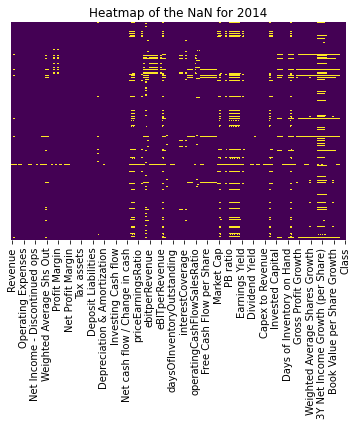

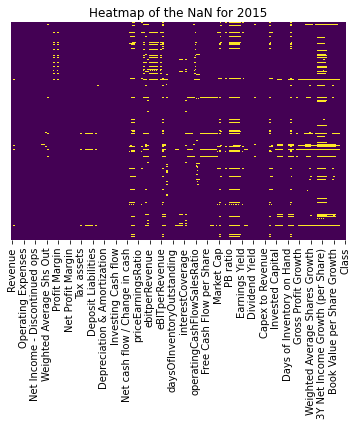

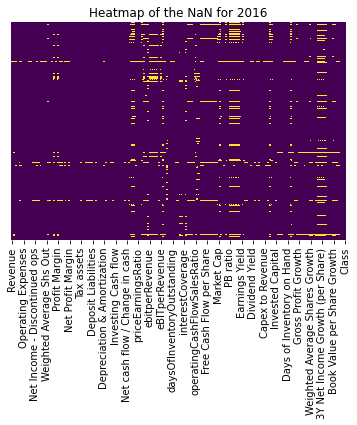

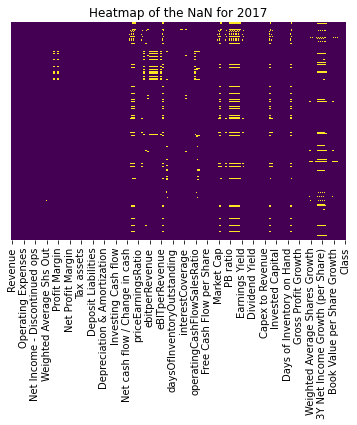

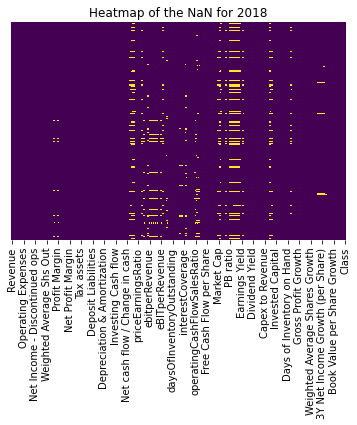

In [17]:
ax = plt.axes()
sns.heatmap(dat14.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2014')
plt.show()

ax = plt.axes()
sns.heatmap(dat15.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2015')
plt.show()

ax = plt.axes()
sns.heatmap(dat16.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2016')
plt.show()

ax = plt.axes()
sns.heatmap(dat17.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2017')
plt.show()

ax = plt.axes()
sns.heatmap(dat18.isnull(), yticklabels = False, cbar = False, cmap = "viridis", ax = ax)
ax.set_title('Heatmap of the NaN for 2018')
plt.show()


#### Response Variables

Before the imputation of the remaining missing values, we will first bring the response values to the desired form. The goal of this case study is to produce investment recomendations of a stock performance compared to the S&P500. Other than in the original dataset, we do not need the price variation of the stock, but rather the equity premium. Then, we will classify the shares into the following three groups:

* Buy: A share outperformed the S&P500 by more than 2.5 percentage points for the year
* Hold: A share performed within +/- 2.5% percentage points of the S&P500 for the year
* Sell: A share performed below the S&P500 by more than 2.5 percentage points for the year

We want to create a model, with is able to predict the class of a share. The predicted class of a share than reprecents the respective investment recommendation for a given year.  As we need to produce yearly investment recommendations, we chose to split the data into 2014-2017 for training and 2018 for testing instead of a randomized split. After imputing the missung values, we will join the datasets from 2014 to 2017 into one single dataset called traindata. The 2018 will then be saved as testdata.

In the next step, we will change the name of the price variation column into "premium" so that we will have the same column name for all of the data sets. Then, we will read in the data of the S&P500 returns from 2015 to 2019 as we always have the price variation for the subsequent years, for example the data 2014 contains the price variation for next 12 months, hence 2015. Afterwards, we will deduce the class (buy, hold or sell) of each share from the equity premium.

In [18]:
# change the PRICE VAR variable name to "premium" in all datasets 
dat14.rename(columns={'2015 PRICE VAR [%]':'premium'}, inplace=True)
dat15.rename(columns={'2016 PRICE VAR [%]':'premium'}, inplace=True)
dat16.rename(columns={'2017 PRICE VAR [%]':'premium'}, inplace=True)
dat17.rename(columns={'2018 PRICE VAR [%]':'premium'}, inplace=True)
dat18.rename(columns={'2019 PRICE VAR [%]':'premium'}, inplace=True)

# read in and display the S&P500 returns 
sp500 = pd.read_csv("dataset/sp500_yearly.csv")
sp500['date'] = ['2015', '2016','2017', '2018', '2019']
sp500.columns = ['date','value']
#sp500['value'] = pd.to_numeric(sp500['value'])
print(sp500)

   date  value
0  2015  -0.73
1  2016   9.54
2  2017  19.42
3  2018  -6.24
4  2019  28.88


In [19]:
# compute the equity premium and the Class for every share in every data set
sets = [dat14, dat15, dat16, dat17, dat18]
years = [2014, 2015, 2016, 2017, 2018]

for i in range(len(sets)):
    # create a year column indicating the year of the respective data set
    sets[i]['Year']= years[i]
    # drop old class variable as we do not need it
    sets[i].drop(['Class'], axis=1, inplace=True)
    # compute the share premium
    sets[i]['premium'] = sets[i]['premium'] - sp500['value'][i]
    # generate the class variables
    sets[i]['Class'] = None
    pd.options.mode.chained_assignment = None
    for j in range(sets[i].shape[0]):
        if sets[i]['premium'][j] > 2.5:
            sets[i]['Class'][j] = 'buy'
        elif sets[i]['premium'][j] < -2.5:
            sets[i]['Class'][j] = 'sell'
        else:
            sets[i]['Class'][j] = 'hold'
    # code the class as category
    sets[i]['Class'] = sets[i]['Class'].astype('category')
    
# update the data sets
dat14 = sets[0]
dat15 = sets[1]
dat16 = sets[2]
dat17 = sets[3]
dat18 = sets[4]

# display the data for 2014 to see how the data looks like now
dat14

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,premium,Year,Class
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-8.593276,2014,sell
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-24.782193,2014,sell
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.848297,2014,buy
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,3.482291,2014,buy
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,13.627715,2014,buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRNS,1.185080e+08,0.0553,8.871800e+07,2.979000e+07,0.000000e+00,2.308500e+07,2.308500e+07,6.705000e+06,2.590000e+05,6.446000e+06,...,-0.0914,-0.0213,-0.0061,-0.0529,0.0000,0.0758,Technology,-1.723386,2014,hold
TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.000000e+00,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,-6.893600e+04,...,0.0000,-0.0041,-0.0049,0.0000,0.0000,0.0213,Technology,30.092884,2014,buy
TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,1.132600e+07,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,1.790100e+07,...,0.0000,-0.1872,0.1823,0.0000,0.2830,-0.0637,Technology,-30.437763,2014,sell
WSTG,3.407580e+08,0.1344,3.159480e+08,2.481000e+07,0.000000e+00,1.651300e+07,1.651300e+07,8.297000e+06,-4.720000e+05,8.758000e+06,...,0.1338,0.0023,0.0890,0.0000,0.0000,0.0650,Technology,8.509579,2014,buy


The last three columns in the datasets have been successfully altered. There are still some NaN values in the data table as one can see in the above shown subset of the data, for example in the "VIPS" row. The following section will now handle these missing values.

#### NaN imputation

As already mentioned above, we will try out different techniques to deal with missing data. Hence, we will fit the models on different versions of the dataset to see how the data preparation contributes to the prediction accuracy of the models. In total, we will use four variations of the data and reflect which kind of imputation turned out to improve our model performance. We decided to use this approach in this case study because the trained models rely heavily on the quality of the training data which in this case also relies on the quality of the imputation of the missing data. 

We will use the following techniques to prepare the data:
* sector-wise median imputer, no removal of outliers
* sector-wise median imputer, with removal of equity premium outliers
* sector-wise median imputer, with removal of equity premium outliers, added economic indicator variables
* Random Forest iterative imputer


##### sector-wise median imputer, no removal of outliers

We will first start with the easiest imputation: a median imputer with no removal of outliers. For this matter, every NaN value in the datasets will be replaced by the sector-wise median of the respective variable. We chose the median because of the its robustness to outliers compared to other statistics such as the mean. Especially without specifically looking after outliers in the data, the median surely is the better choice. In this case, we also made the simplifying assumption, that companies in a sector are more similar to each other than companies from different sectors. Hence, we will replace the missing values with the median computed only for the companies in the same sector. 

After the imputation, we check wheter there are still some missing values in the data and save the resulting datasets accordingly.

In [20]:
# make copies of the current data sets as we will need them for other imputation methods
dat14_median = dat14.copy()
dat15_median = dat15.copy()
dat16_median = dat16.copy()
dat17_median = dat17.copy()
dat18_median = dat18.copy()

sets = [dat14_median, dat15_median, dat16_median, dat17_median, dat18_median]

# Replace nan-values with median value of column, considering each sector individually.
for i in range(len(sets)):
    sector = sets[i]["Sector"]
    Class = sets[i]["Class"]
    sets[i] = sets[i].groupby(['Sector']).transform(lambda x: x.fillna(x.median()))
    sets[i]["Sector"] = sector  # this line is needed to maintain the sector variable in the dataset
    sets[i]["Class"] = Class # this line is needed to maintain the Class variable in the dataset

# update the data sets

dat14_median = sets[0]
dat15_median = sets[1]
dat16_median = sets[2]
dat17_median = sets[3]
dat18_median = sets[4]

# merge all datasets into one dataset only and save it
data_median = pd.concat([sets[0], sets[1], sets[2], sets[3], sets[4]])
data_median.to_csv(r'dataset/data_median.csv')

# get some information on the dataset
print(data_median.shape) 
print(data_median.isna().sum().sum())

(19796, 176)
0


We now successfully imputed all missing values, there are no missing values in this dataset anymore. Over all five years, we have 19796 observations now and 175 variables. 

##### sector-wise median imputer, with removal of equity premium outliers


Due to the different nature of the different variables, there are some very large values in the dataset. Especially as there are growth rate variables, there will always be some values which may appear like outliers but are in fact correct. For example, a small company, which has only 100 USD of profit in a year but 200 USD in the following year, increased their profit by 100%. However, if a large company draws exactly 1 billion USD in a year, but only 100 USD more in the following year, profit growth will only be slighty above 1. Due to the presence of such relative financial indicators in our dataset, it is extremely difficult to search for outliers over the whole data. Hence, we will only focus on outliers considering the variable of our interest: the equity premium. For this reason, we will reuse the data with the median imputed values from before and remove those shares which have improbable equity premiums. 


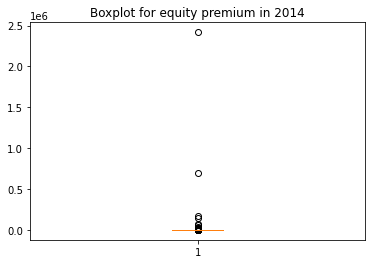

count    3.622000e+03
mean     1.015682e+03
std      4.202104e+04
min     -9.966722e+01
25%     -2.822687e+01
50%     -4.770806e+00
75%      1.436945e+01
max      2.418602e+06
Name: premium, dtype: float64

In [21]:
# display boxplot
plt.boxplot(dat14_median["premium"])
plt.title("Boxplot for equity premium in 2014")
plt.show()
# display key statistics
dat14_median["premium"].describe()

By looking at the boxplot for the 2014 data, we can already say that there are some shares with extremely high equity premium compared to the other ones. From the minimum to the third quartile, we have values from around -99.7% to 143.7%. These values are realistic. However, the highest equity premium is at 2418602%! Such a performance is extremely implausible for a S&P500 stock, hence we do need to cut off some values from at the top. For the sake of simplicity, we only showed the statistics for the equity premium in the 2014 data. However, the other datasets show a similar structure for the equity premium. 

To get rid of these outliers, we will remove the 1% of the shares with the highest equity premium as this threshold yields a more realistic picture for share premiums for the given data:

In [22]:
# remove all shares whose equity premium is at the top 1% of all equity premiums
sets = [dat14_median, dat15_median, dat16_median, dat17_median, dat18_median]

for i in range(len(sets)):
    upper = sets[i]["premium"].quantile(0.99)
    outliers = np.where(sets[i]["premium"] > upper, True, False)
    print(names[i], "INITIAL NUMBER OF OBS.:", sets[i].shape[0])
    sets[i] = sets[i].loc[~(outliers),]
    print(names[i], "NUMBER OF OBS. AFTER REMOVING OUTLIERS", sets[i].shape[0])
    print(50*"-")
    
# update the data sets
dat14_median_no = sets[0]
dat15_median_no = sets[1]
dat16_median_no = sets[2]
dat17_median_no = sets[3]
dat18_median_no = sets[4]   

dat14 INITIAL NUMBER OF OBS.: 3622
dat14 NUMBER OF OBS. AFTER REMOVING OUTLIERS 3585
--------------------------------------------------
dat15 INITIAL NUMBER OF OBS.: 3836
dat15 NUMBER OF OBS. AFTER REMOVING OUTLIERS 3797
--------------------------------------------------
dat16 INITIAL NUMBER OF OBS.: 4067
dat16 NUMBER OF OBS. AFTER REMOVING OUTLIERS 4026
--------------------------------------------------
dat17 INITIAL NUMBER OF OBS.: 4130
dat17 NUMBER OF OBS. AFTER REMOVING OUTLIERS 4088
--------------------------------------------------
dat18 INITIAL NUMBER OF OBS.: 4141
dat18 NUMBER OF OBS. AFTER REMOVING OUTLIERS 4099
--------------------------------------------------


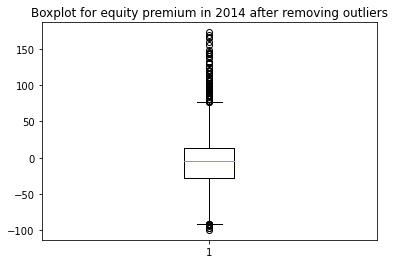

count    3585.000000
mean       -5.882998
std        35.871451
min       -99.667220
25%       -28.470573
50%        -5.169279
75%        13.623891
max       173.007230
Name: premium, dtype: float64

In [23]:
# display boxplot
plt.boxplot(dat14_median_no["premium"])
plt.title("Boxplot for equity premium in 2014 after removing outliers")
plt.show()
# display key statistics
dat14_median_no["premium"].describe()

The boxplot as well as the location statistics now show a more natural distribution for the equity premium. Given this boxplot, there still some observations that are rather high compared to the other ones, but this is tipical for financial data which tends to be right squewed. We now can also see, that the bulk of the observations are around 0%. 

This shortened dataset is saved in the following as data_median_no, which stands for median imputed NaN and no outliers:

In [24]:
# save data
data_median_no = pd.concat([dat14_median_no, dat15_median_no, dat16_median_no, dat17_median_no, dat18_median_no])
data_median_no.to_csv(r'dataset/data_median_no.csv')
print(data_median.shape) 
print(data_median.isna().sum().sum())

(19796, 176)
0


##### sector-wise median imputer, with removal of equity premium outliers, added economic indicator variables

We will now take the data with the median imputed values wihtout equity premium outliers and add some economic variables to the dataset to see if they are able to improove the prediction performance. For this, we will use annual values, hence the values for one of the variables will be the same within the same year. We opted to include the following four economic indicators which are essential in macroeconomics: 

In [25]:
indicators = pd.read_csv("dataset/indicators_USA.csv")
indicators = indicators[["Indicator Name", "2014", "2015", "2016", "2017", "2018"]]
indicators.iloc[:,1:6] = indicators.iloc[:,1:6]/100
indicators

,Indicator Name,2014,2015,2016,2017,2018
0,Real interest rate,0.013747,0.021957,0.024510,0.021721,0.024095
1,GDP growth,0.025260,0.029080,0.016378,0.023698,0.029273
2,Inflation,0.016222,0.001186,0.012616,0.021301,0.024426
3,Unemployment rate,0.061700,0.052800,0.048700,0.043600,0.039000


In [26]:
sets = [dat14_median_no, dat15_median_no, dat16_median_no, dat17_median_no, dat18_median_no]
years = ["2014", "2015", "2016", "2017", "2018"]

# include the variables into the data sets
for i in range(len(sets)):
    sets[i]["Real interest rate"] = indicators[years[i]][0]
    sets[i]["GDP growth"] = indicators[years[i]][1]
    sets[i]["Inflation"] = indicators[years[i]][2]
    sets[i]["Unemployment rate"] = indicators[years[i]][3]

# update the data sets
dat14_econ = sets[0]
dat15_econ = sets[1]
dat16_econ = sets[2]
dat17_econ = sets[3]
dat18_econ = sets[4]
  
# save the data
data_econ = pd.concat([dat14_econ, dat15_econ, dat16_econ, dat17_econ, dat18_econ])
data_econ.to_csv(r'dataset/data_econ.csv')
print(data_econ.shape) 
print(data_econ.isna().sum().sum())

#display the data
data_econ

(19595, 180)
0


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,R&D Expense Growth,SG&A Expenses Growth,premium,Year,Sector,Class,Real interest rate,GDP growth,Inflation,Unemployment rate
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,0.0000,-0.1746,-8.593276,2014,Consumer Defensive,sell,0.013747,0.025260,0.016222,0.0617
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,1.6484,1.7313,-24.782193,2014,Consumer Defensive,sell,0.013747,0.025260,0.016222,0.0617
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.0000,0.0234,33.848297,2014,Consumer Defensive,buy,0.013747,0.025260,0.016222,0.0617
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,0.0000,-0.0060,3.482291,2014,Consumer Defensive,buy,0.013747,0.025260,0.016222,0.0617
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.0000,-0.0220,13.627715,2014,Consumer Defensive,buy,0.013747,0.025260,0.016222,0.0617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,-0.2602,-119.842099,2018,Real Estate,sell,0.024095,0.029273,0.024426,0.0390
YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.0352,-0.0993,-106.802077,2018,Basic Materials,sell,0.024095,0.029273,0.024426,0.0390
ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.2415,0.8987,-46.714400,2018,Basic Materials,sell,0.024095,0.029273,0.024426,0.0390
ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,2.7499,0.1457,-102.400000,2018,Industrials,sell,0.024095,0.029273,0.024426,0.0390


##### random forest iterative imputer

In this part, we try to impute missing values by using another method for imputation: the so-called iterative imputation. For that, we use the IterativeImputer method from sklearn. The iterative imputer takes a column with missing values and treats it as a response variable as a function of other columns. By doing so, we can predict missing values inside a column. The iterative imputer first assigns a simple imputed value to the NA values (e.g. mean/median/mode) and then iteratively replaces the NA values by values from the fitted model until convergence. We will use the iterative imputer on the same dataset where we used the median imputer.  

The goal of using iterative imputation is to achieve a better prediction accuracy than by simple imputation since iterative imputation uses more sophisticated methods to fit the missing values.

As usual, if we want to predict data, we need some model or estimator. For this imputation task we use the so called extra-trees regressor (which stands for extremely randomized trees) introduced by Geurts et. al. (2006). It works similarly to Random Forests. The extra-trees algorithm basically builds even more randomized trees by randomizing both attribute and cut-point choice at split points. Luckily, it is already implemented so we need not fit it ourselves. A big advantage of the extra-trees algorithm is that it is much faster than the random forest algorithm since it chooses splits randomly instead of looking for the optimal splitpoint. This is a big advantage in our case because we do not have strong computing power and this iteratively imputation normally takes many hours. Further, the extra trees algorithm uses the whole sample by default in comparison to the Random Forest algorithm which uses bootstrapped samples.

In [27]:
# first, we need to drop the categorical variables from the dataset
dat14 = dat14.drop(['Year', 'Sector', 'Class'], axis = 1)
dat15 = dat15.drop(['Year', 'Sector', 'Class'], axis = 1)
dat16 = dat16.drop(['Year', 'Sector', 'Class'], axis = 1)
dat17 = dat17.drop(['Year', 'Sector', 'Class'], axis = 1)
dat18 = dat18.drop(['Year', 'Sector', 'Class'], axis = 1)

In [28]:
# print the time before imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("Start Time =", current_time)

# use iterative imputer
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0, max_iter=2, tol=0.1)
imputer.fit(dat14)
dat14_iter = imputer.transform(dat14)
# save the imputed data
np.savetxt("dataset/dat14_iter.csv", dat14_iter, delimiter=",")

# print the time after imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("End Time =", current_time, ": 2014 data has been imputed")

Start Time = 17/04/2021 14:50:39
End Time = 17/04/2021 15:26:49 : 2014 data has been imputed


In [29]:
# print the time before imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("Start Time =", current_time)

# use iterative imputer
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0, max_iter=2, tol=0.1)
imputer.fit(dat15)
dat15_iter = imputer.transform(dat15)
# save the imputed data
np.savetxt("dataset/dat15_iter.csv", dat15_iter, delimiter=",")

# print the time after imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("End Time =", current_time, ": 2015 data has been imputed")

Start Time = 17/04/2021 15:26:49
End Time = 17/04/2021 16:05:39 : 2015 data has been imputed


In [30]:
# print the time before imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("Start Time =", current_time)

# use iterative imputer
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0, max_iter=2, tol=0.1)
imputer.fit(dat16)
dat16_iter = imputer.transform(dat16)
# save the imputed data
np.savetxt("dataset/dat16_iter.csv", dat16_iter, delimiter=",")

# print the time after imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("End Time =", current_time, ": 2016 data has been imputed")

Start Time = 17/04/2021 16:05:39
End Time = 17/04/2021 16:46:35 : 2016 data has been imputed


In [31]:
# print the time before imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("Start Time =", current_time)

# use iterative imputer
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0, max_iter=2, tol=0.1)
imputer.fit(dat17)
dat17_iter = imputer.transform(dat17)
# save the imputed data
np.savetxt("dataset/dat17_iter.csv", dat17_iter, delimiter=",")

# print the time after imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("End Time =", current_time, ": 2017 data has been imputed")

Start Time = 17/04/2021 16:46:36
End Time = 17/04/2021 17:29:29 : 2017 data has been imputed


In [32]:
# print the time before imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("Start Time =", current_time)

# use iterative imputer
imputer = IterativeImputer(estimator=ExtraTreesRegressor(), random_state=0, max_iter=2, tol=0.1)
imputer.fit(dat18)
dat18_iter = imputer.transform(dat18)
# save the imputed data
np.savetxt("dataset/dat18_iter.csv", dat18_iter, delimiter=",")

# print the time after imputing
now = datetime.now()
current_time = now.strftime("%d/%m/%Y %H:%M:%S")
print("End Time =", current_time, ": 2018 data has been imputed")

Start Time = 17/04/2021 17:29:29
End Time = 17/04/2021 18:11:33 : 2018 data has been imputed


After imputation, we need to add column names again and also add the class variable such that we have complete data frames. The following code chunk first loads the newly created data for the five datasets:

In [33]:
##iteratively imputed data
dat14_iter = pd.read_csv("dataset/dat14_iter.csv", header = None).set_index(dat14_median.index)
dat15_iter = pd.read_csv("dataset/dat15_iter.csv", header = None).set_index(dat15_median.index)
dat16_iter = pd.read_csv("dataset/dat16_iter.csv", header = None).set_index(dat16_median.index)
dat17_iter = pd.read_csv("dataset/dat17_iter.csv", header = None).set_index(dat17_median.index)
dat18_iter = pd.read_csv("dataset/dat18_iter.csv", header = None).set_index(dat18_median.index)


The next two code chunks are needed to add the categorical variables "Year", "Sector" and "Class" again to the data. We use the column of the median imputed data for this as these are the same. Finally, we add the column names back to the original ones.

In [34]:
#need to add back the missing columns: Year, Sector and Class
#first extract them from the other dataframes
dat14_toappend = dat14_median.iloc[: , -3:]
dat15_toappend = dat15_median.iloc[: , -3:]
dat16_toappend = dat16_median.iloc[: , -3:]
dat17_toappend = dat17_median.iloc[: , -3:]
dat18_toappend = dat18_median.iloc[: , -3:]

dat14_iter = pd.concat([dat14_iter, dat14_toappend], axis = 1)
dat15_iter = pd.concat([dat15_iter, dat15_toappend], axis = 1)
dat16_iter = pd.concat([dat16_iter, dat16_toappend], axis = 1)
dat17_iter = pd.concat([dat17_iter, dat17_toappend], axis = 1)
dat18_iter = pd.concat([dat18_iter, dat18_toappend], axis = 1)

In [43]:
#finally, change column names
colnames = list(dat14_median.columns)
dat14_iter.columns = colnames
dat15_iter.columns = colnames
dat16_iter.columns = colnames
dat17_iter.columns = colnames
dat18_iter.columns = colnames

dat14_iter

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,premium,Year,Sector,Class
PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,...,-0.021700,0.035900,0.03160,0.122800,0.0000,-0.1746,-8.593276,2014,Consumer Defensive,sell
VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,1.753823e+08,...,1.033684,1.908871,2.35303,4.507142,1.6484,1.7313,-24.782193,2014,Consumer Defensive,sell
KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,2.270000e+09,...,0.098100,0.188600,0.32680,0.273800,0.0000,0.0234,33.848297,2014,Consumer Defensive,buy
RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,2.502180e+08,...,-0.051000,-0.018900,0.19630,-0.045800,0.0000,-0.0060,3.482291,2014,Consumer Defensive,buy
GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,2.707700e+09,...,0.009000,0.021500,0.02740,0.102500,0.0000,-0.0220,13.627715,2014,Consumer Defensive,buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRNS,1.185080e+08,0.0553,8.871800e+07,2.979000e+07,0.000000e+00,2.308500e+07,2.308500e+07,6.705000e+06,2.590000e+05,6.446000e+06,...,-0.091400,-0.021300,-0.00610,-0.052900,0.0000,0.0758,-1.723386,2014,Technology,hold
TSRI,4.952987e+07,0.1028,4.125164e+07,8.278229e+06,0.000000e+00,8.253061e+06,8.253061e+06,2.516800e+04,0.000000e+00,-6.893600e+04,...,0.000000,-0.004100,-0.00490,0.000000,0.0000,0.0213,30.092884,2014,Technology,buy
TZOO,1.532400e+08,-0.1019,1.917400e+07,1.340660e+08,1.132600e+07,1.125130e+08,1.162560e+08,1.781000e+07,0.000000e+00,1.790100e+07,...,0.000000,-0.187200,0.18230,0.000000,0.2830,-0.0637,-30.437763,2014,Technology,sell
WSTG,3.407580e+08,0.1344,3.159480e+08,2.481000e+07,0.000000e+00,1.651300e+07,1.651300e+07,8.297000e+06,-4.720000e+05,8.758000e+06,...,0.133800,0.002300,0.08900,0.000000,0.0000,0.0650,8.509579,2014,Technology,buy


Finally, we concatenate all the datasets into one set called data_iter.

In [44]:
data_iter = pd.concat([dat14_iter, dat15_iter, dat16_iter, dat17_iter, dat18_iter])
data_iter.to_csv(r'dataset/data_iter.csv')

**Side note:**
At this step, one could also remove the equity premium outliers and add economic indicators to the imputed data as done above for the sector wise imputed data. For simplicity we will not execute these two alterations for the iterative data as we would need to fit and compare all the different models for two more datasets. This would lead to a considerable increase of computational effort and to more complex and less readable notebooks. We denote however, that this would surely be something worth to look into in a further research.

## Principal Component Analysis

In this section of the code, we will analyse how many of the features are able to explain most of the variation in the feature space. For this, only the numeric features will be considered, hence we drop the categorical variables, the year and the equity premium. The PCA will be carried out on the whole dataset for each of the above constructed dataset.

##### sector-wise median imputer, no removal of outliers

Before we can conduct the PCA, we first need to standardize the data as the variables live on different scales. Otherwise, variables which have higher numbers would dominate and receive an unreasonably high weight. In the following code chunk we illustrate the principal component plot for the dataset with median imputed NaNs and included equity premium outliers.

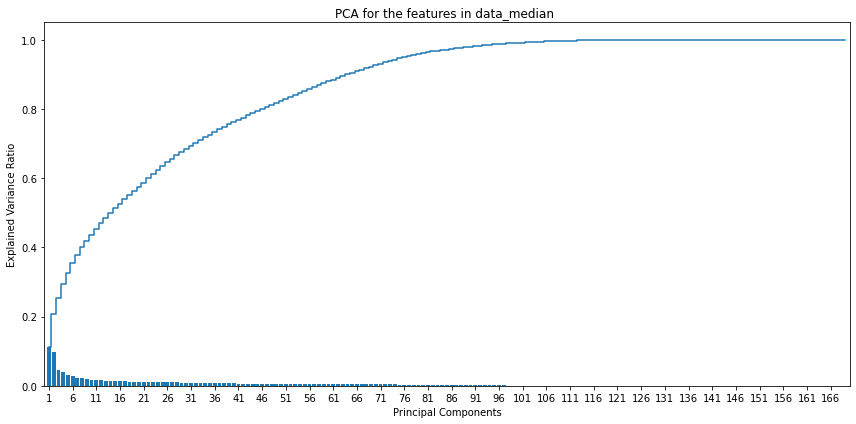

In [37]:
# Get columnss to scale
cols_scl = data_median.columns.values[:173]

# Apply StandardScaler on continuous columns only
stdsc = StandardScaler()
data_median_std = stdsc.fit_transform(data_median[cols_scl])
data_median_std = pd.DataFrame(data_median_std, columns = cols_scl, index = list(data_median.index))

# Run PCA for all possible PCs
pca = PCA().fit(data_median_std[data_median_std.columns[0:-4]])

# Define max no. of PC
q = data_median_std[data_median_std.columns[0:-4]].shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]

# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.title("PCA for the features in data_median ")
plt.tight_layout();

 We see that the first 100 principal components approximately describe al the variation in the dataset. This means that we could construct 100 features through linear combinations of the existing features that would be able to explain all variability. Thus, we argue that there would still be the possibility of reducing the number of features without information loss. However, this would also lead to a loss in interpretability as it is less intuitive to interpret the principal components compared to the financial indicators itself. We will therefore still use the whole dataset to train the models. The data will probably contain multicollinearity. Depending on the used model this may be an issue. Hence, Machine Learning algorithms which use regularization to minimize the number of features are able to deal with this problem.

##### sector-wise median imputer, with removal of equity premium outliers

The dataset without equity premium outliers shows a very similar picture of the principal components:

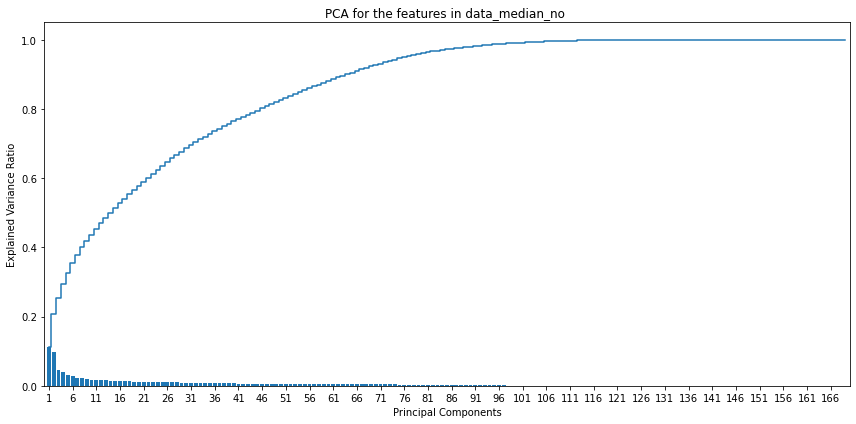

In [38]:
# Get columnss to scale
cols_scl = data_median_no.columns.values[:173]

# Apply StandardScaler on continuous columns only
stdsc = StandardScaler()
data_median_no_std = stdsc.fit_transform(data_median_no[cols_scl])
data_median_no_std = pd.DataFrame(data_median_no_std, columns = cols_scl, index = list(data_median_no.index))

# Run PCA for all possible PCs
pca = PCA().fit(data_median_no_std[data_median_no_std.columns[0:-4]])

# Define max no. of PC
q = data_median_no_std[data_median_no_std.columns[0:-4]].shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]

# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.title("PCA for the features in data_median_no ")
plt.tight_layout();

##### sector-wise median imputer, with removal of equity premium outliers, added economic indicator variables

As we only added four more indicators to the data, it is hard to see whether this has a significant effect on the data, especially as the values for each indicator are the same within a year. This is why the principal component plot for the data_econ looks very similar to the plots before. It will be easier to assess if adding the economic variables improves prediction when we carry them out. 

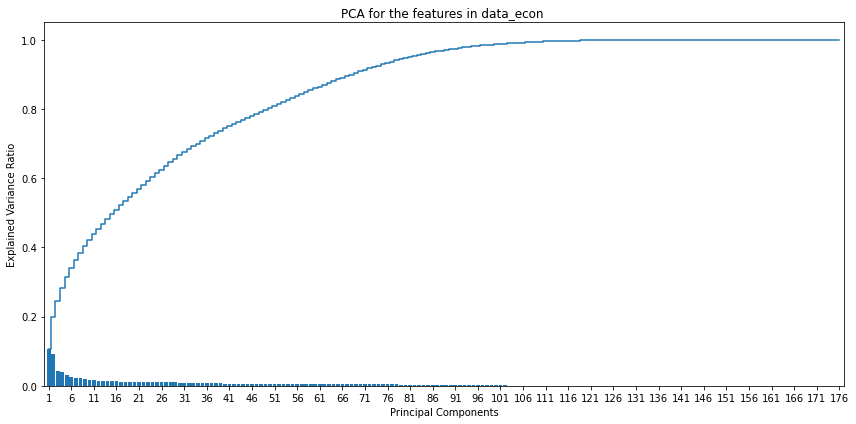

In [39]:
# drop the variables which are not needed for the PCA
data_econ.drop(["premium", "Sector", "Class", "Year"], axis=1, inplace = True)

# Get columnss to scale
cols_scl = data_econ.columns.values

# Apply StandardScaler on continuous columns only
stdsc = StandardScaler()
data_econ_std = stdsc.fit_transform(data_econ[cols_scl])
data_econ_std = pd.DataFrame(data_econ_std, columns = cols_scl, index = list(data_econ.index))

# Run PCA for all possible PCs
pca = PCA().fit(data_econ_std[data_econ_std.columns])

# Define max no. of PC
q = data_econ_std[data_econ_std.columns].shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]

# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.title("PCA for the features in data_econ ")
plt.tight_layout();

##### random forest iterative imputer

The PCA plot for the iteratively imputed data looks also very similar to the aforementioned ones.

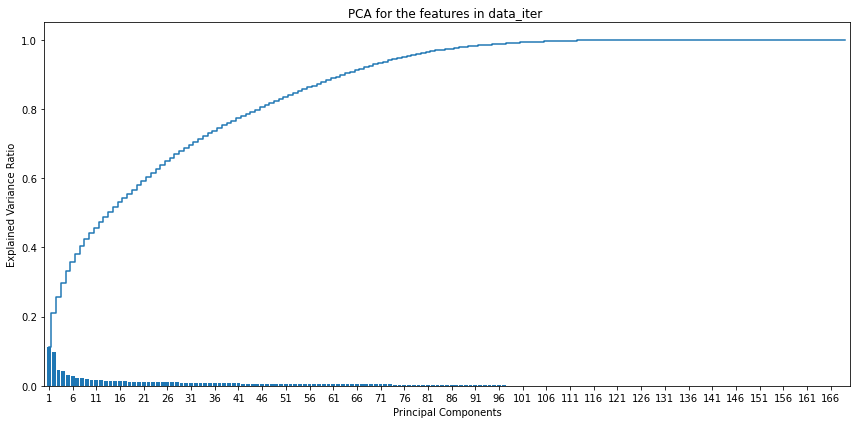

In [40]:
# Get columnss to scale
cols_scl = data_iter.columns.values[:173]

# Apply StandardSciterler on continuous columns only
stdsc = StandardScaler()
data_iter_std = stdsc.fit_transform(data_iter[cols_scl])
data_iter_std = pd.DataFrame(data_iter_std, columns = cols_scl, index = list(data_iter.index))

# Run PCA for all possible PCs
pca = PCA().fit(data_iter_std[data_iter_std.columns[0:-4]])

# Define max no. of PC
q = data_iter_std[data_iter_std.columns[0:-4]].shape[1]

# Get cumsum of the PC 1-q
expl_var = pca.explained_variance_ratio_
sum_expl_var = np.cumsum(expl_var)[:q]

# Plot Feature Importance (both cumul., individual)
plt.figure(figsize=(12, 6))
plt.bar(range(1, q + 1), expl_var, align='center')
plt.xticks(range(1, q + 1, 5))
plt.xlim([0, q + 1])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.step(range(1, 1 + q), sum_expl_var, where='mid')
plt.title("PCA for the features in data_iter ")
plt.tight_layout();

## References

* Friedman, J., Hastie, T., & Tibshirani, R. (2001). *The Elements of Statistical Learning*. New York: Springer.
* Geurts, P., Ernst, D., & Wehenkel, L. (2006). Extremely randomized trees. MachineLearning, 63(1), 3–42.